In [0]:
!mkdir work
!cd work
!git clone https://github.com/UniversalDependencies/UD_Japanese-GSD
!git clone https://github.com/uehara1414/japanize-matplotlib

In [0]:
!pip install nagisa
!pip install wordcloud

In [0]:
import nagisa


def write_file(fn_in, fn_out):
    with open(fn_in, "r") as f:
        data = []
        words = []
        postags = []
        for line in f:
            line = line.strip()

            if len(line) > 0:
                prefix = line[0]
                if prefix != "#":
                    tokens = line.split("\t")
                    word = tokens[1]
                    postag = tokens[3]
                    words.append(word)
                    postags.append(postag)

            else:
                if (len(words) > 0) and (len(postags) > 0):
                    data.append([words, postags])
                    words = []
                    postags = []

    with open(fn_out, "w") as f:
        for words, postags in data:
            for word, postag in zip(words, postags):
                f.write("\t".join([word, postag])+"\n")
            f.write("EOS\n")



# files
fn_in_train = "UD_Japanese-GSD/ja_gsd-ud-train.conllu"    
fn_out_train = "ja_gsd_ud.train"

# write files for nagisa
write_file(fn_in_train, fn_out_train)

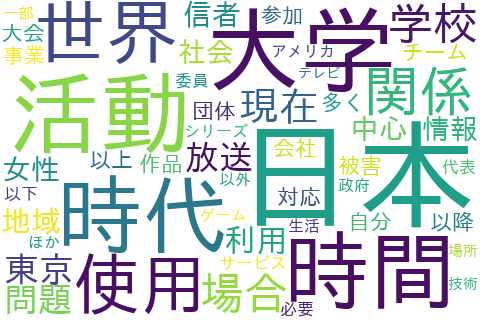

In [4]:
from wordcloud import WordCloud
from IPython.display import Image,display_png

# load a file
fn_in = "ja_gsd_ud.train"                
X, Y = nagisa.utils.load_file(fn_in)                                             

# word segmentation
text = ""                                                               
for x in X:                                                             
    s = "".join(x)                                                      
    nouns = nagisa.extract(s, extract_postags=['名詞'])                 
    text += " ".join(nouns.words)                                       

# make a word cloud
stopwords = ["こと", "ため", "もの", "とも"]
ja_font = "japanize-matplotlib/japanize_matplotlib/fonts/ipaexg.ttf"            
wordcloud = WordCloud(width=480, height=320, max_words=50, font_path=ja_font, 
                          stopwords=stopwords, background_color='white', prefer_horizontal=1.)        
wordcloud.generate(text)                                                
wordcloud.to_file('wordcloud.png')
display_png(Image('wordcloud.png'))